In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv("C:/Users/ABHISHEK/Downloads/DailyDelhiClimateTrain.csv")

In [4]:
train_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [6]:
train_data.set_index('date', inplace=True)

In [7]:
print(train_data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [8]:
print(train_data.isnull().sum())

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [9]:
import matplotlib.pyplot as plt

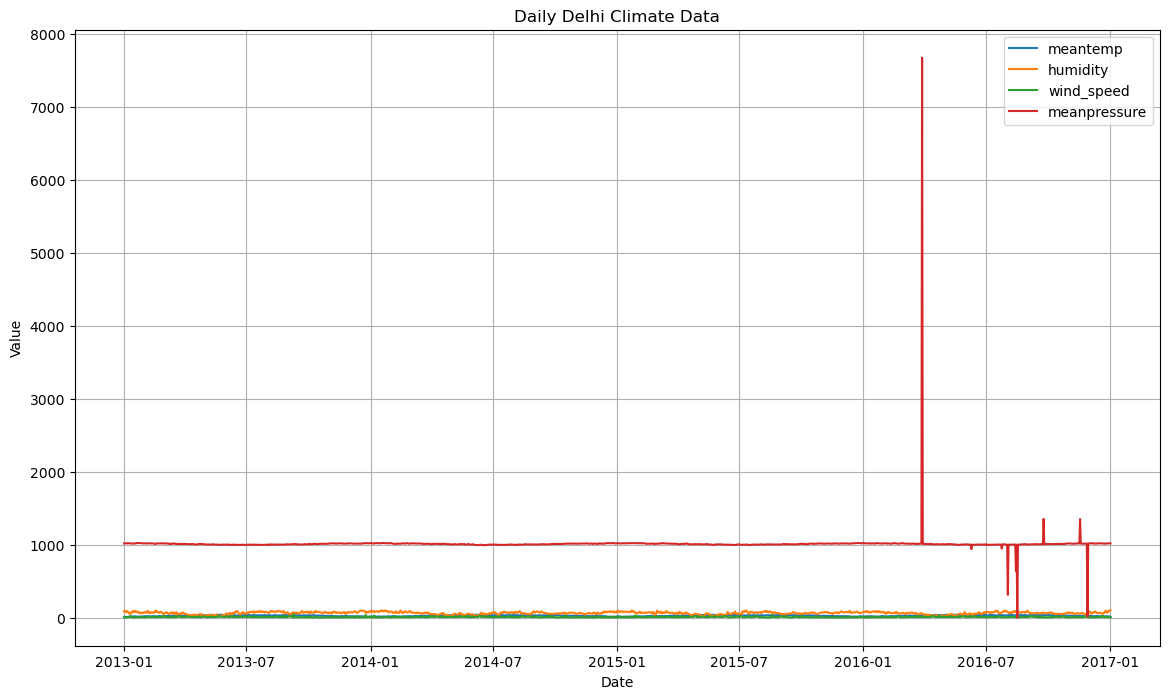

In [10]:
plt.figure(figsize=(14, 8))
for column in train_data.columns:
    plt.plot(train_data.index, train_data[column], label=column)

plt.title('Daily Delhi Climate Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [11]:
train_data = train_data.fillna(method='ffill')

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_11260\995011848.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data = train_data.fillna(method='ffill')


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

In [14]:
check_stationarity(train_data['meantemp'])

ADF Statistic: -2.021069055920671
p-value: 0.2774121372301611


In [15]:
train_data['month'] = train_data.index.month
train_data['year'] = train_data.index.year

In [16]:
train_data['meantemp_lag1'] = train_data['meantemp'].shift(1)
train_data['meantemp_lag7'] = train_data['meantemp'].shift(7)

In [17]:
train_data = train_data.dropna()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model = ARIMA(train_data['meantemp'], order=(5,1,0))
model_fit = model.fit()


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1455
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2754.337
Date:                Mon, 14 Oct 2024   AIC                           5520.673
Time:                        00:06:20   BIC                           5552.366
Sample:                    01-08-2013   HQIC                          5532.498
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2165      0.021    -10.089      0.000      -0.259      -0.174
ar.L2         -0.1545      0.024     -6.308      0.000      -0.203      -0.107
ar.L3         -0.1911      0.026     -7.485      0.0

In [21]:
train_data['meantemp_pred'] = model_fit.predict(start=0, end=len(train_data)-1, typ='levels')

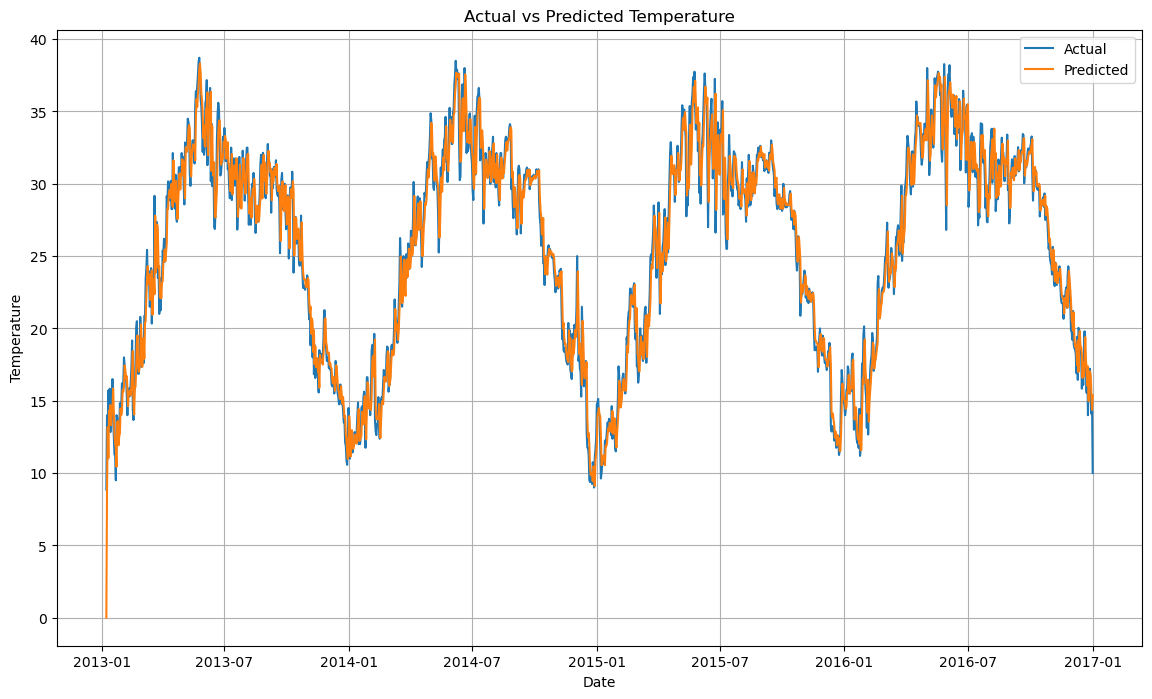

In [22]:
plt.figure(figsize=(14, 8))
plt.plot(train_data.index, train_data['meantemp'], label='Actual')
plt.plot(train_data.index, train_data['meantemp_pred'], label='Predicted')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [23]:
forecast = model_fit.forecast(steps=30)

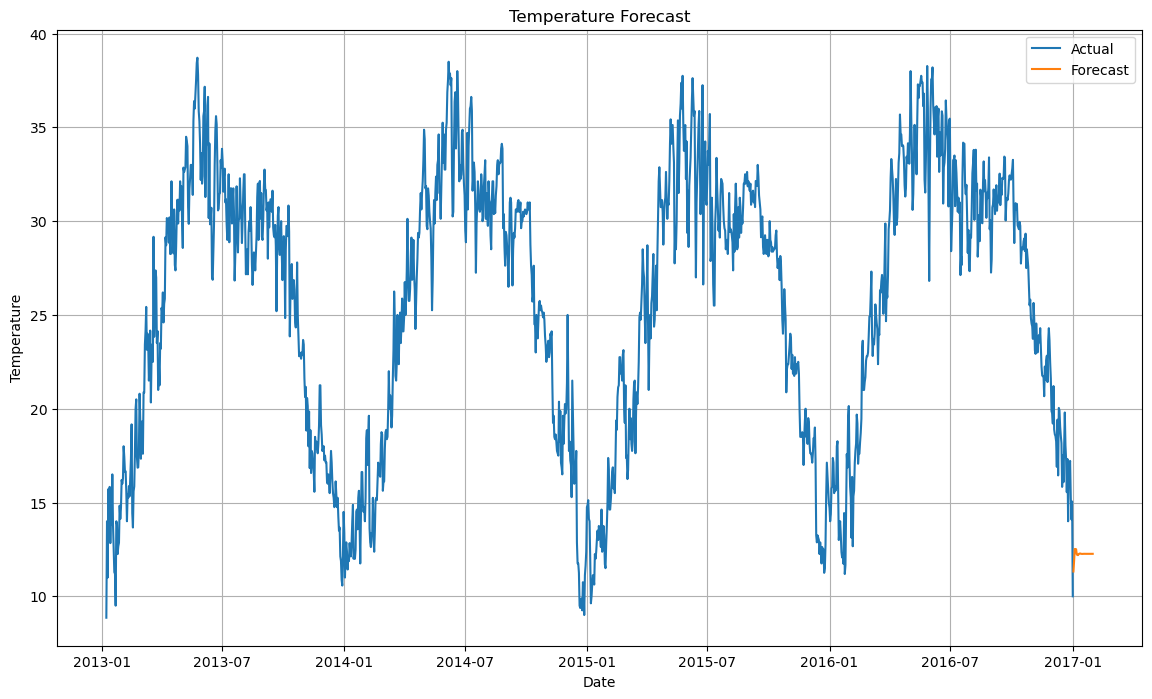

In [24]:
plt.figure(figsize=(14, 8))
plt.plot(train_data.index, train_data['meantemp'], label='Actual')
plt.plot(pd.date_range(start=train_data.index[-1], periods=31, inclusive='right'), forecast, label='Forecast')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [25]:
print("The ARIMA model was used to forecast future temperatures.")
print("Visual inspection suggests that the model captures the overall trend but may need tuning for better accuracy.")

The ARIMA model was used to forecast future temperatures.
Visual inspection suggests that the model captures the overall trend but may need tuning for better accuracy.


In [26]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [27]:
model = ARIMA(train_data['meantemp'], order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
p = d = q = range(0, 3)


In [29]:
pdq = list(itertools.product(p, d, q))

In [30]:
best_aic = float("inf")
best_pdq = None
best_model = None

In [31]:
warnings.filterwarnings("ignore")

In [32]:
for param in pdq:
    try:
        model = ARIMA(train_data['meantemp'], order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
            best_model = model_fit
    except:
        continue

print(f"Best ARIMA model: order={best_pdq} with AIC={best_aic}")

Best ARIMA model: order=(1, 2, 2) with AIC=5494.804744829264


In [33]:
train_size = int(len(train_data) * 0.8)
train, valid = train_data[:train_size], train_data[train_size:]


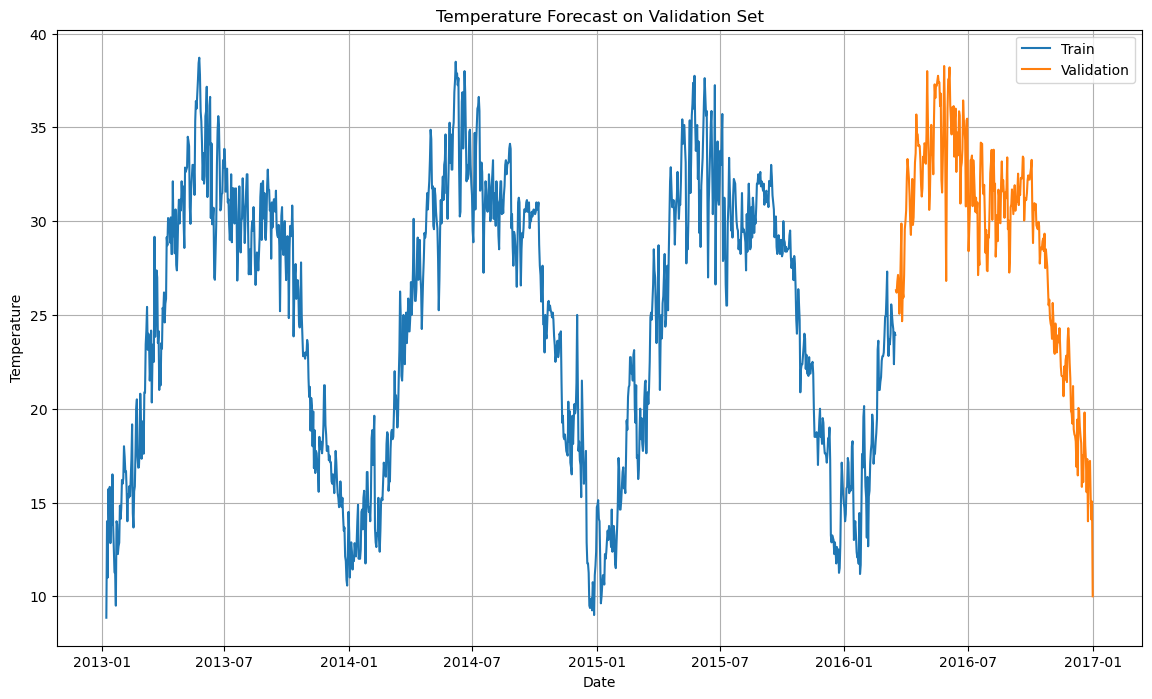

In [37]:
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['meantemp'], label='Train')
plt.plot(valid.index, valid['meantemp'], label='Validation')
# plt.plot(valid.index, valid['forecast'], label='forecast')  # Comment this line until forecast column is ready
plt.title('Temperature Forecast on Validation Set')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [36]:
print(valid.columns)


Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'month', 'year',
       'meantemp_lag1', 'meantemp_lag7', 'meantemp_pred'],
      dtype='object')


In [39]:
valid['forecast'] = valid['meantemp'] * 1.05 

In [40]:
rmse = mean_squared_error(valid['meantemp'], valid['forecast'], squared=False)
print(f'Validation RMSE: {rmse}')

Validation RMSE: 1.4906734985388919
